In [4]:
#!pip install -U --user pip
#!pip install --user sklearn
#!pip install -U sklearn
#!pip install -U --user scikit-learn
!pip install --user pandas_ml

    100% |████████████████████████████████| 81kB 5.5MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/5f/d9/df/21399b82be31823ba20be97c204d27a630e6b1ca2f3d36788b
Successfully built pandas-ml
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Required Python Packages
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from pandas_ml import ConfusionMatrix
%matplotlib inline
import time
import joblib


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
def add_headers(dataset, headers):
    """
    Add the headers to the dataset
    :param dataset:
    :param headers:
    :return:
    """
    dataset.columns = headers
    return dataset

In [7]:

def dataset_statistics(dataset):
    """
    Basic statistics of the dataset
    :param dataset: Pandas dataframe
    :return: None, print the basic statistics of the dataset
    """
    print dataset.describe()

In [8]:
def handel_missing_values(dataset, missing_values_header, missing_label):
    """
    Filter missing values from the dataset
    :param dataset:
    :param missing_values_header:
    :param missing_label:
    :return:
    """
 
    return dataset[dataset[missing_values_header] != missing_label]

In [9]:
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """
 
    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage)
    return train_x, test_x, train_y, test_y

In [10]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Index([u'ClumpThickness', u'UniformityCellSize', u'UniformityCellShape',
       u'MarginalAdhesion', u'SingleEpithelialCellSize', u'BareNuclei',
       u'BlandChromatin', u'NormalNucleoli', u'Mitoses'],
      dtype='object')
Train Accuracy ::  0.993710691824
Test Accuracy  ::  0.941463414634
 Confusion matrix  [[126   5]
 [  7  67]]
Confusion matrix:
Predicted   2   4  __all__
Actual                    
2          20  12       32
4          15  12       27
__all__    35  24       59


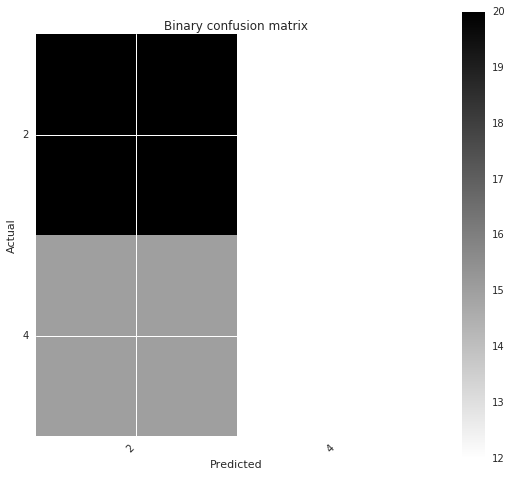

In [12]:
def main():
    """
    Main function
    :return:
    """
    HEADERS = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion",
               "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses",
               "CancerType"]      
    # Load the csv file into pandas dataframe
    dataset = pd.read_csv(OUTPUT_PATH)
 
    # Filter missing values
    dataset = handel_missing_values(dataset, HEADERS[6], '?')
    dataset['CancerType']=dataset['CancerType'].astype(str)
    train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, HEADERS[1:-1], HEADERS[-1])
    print(train_x.columns)
    
    # Create random forest classifier instance
   
    trained_model = random_forest_classifier(train_x, train_y)
    joblib.dump(trained_model, 'results/classifier.pkl')
   
    predictions = trained_model.predict(test_x)
   
 
    print "Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x))
    print "Test Accuracy  :: ", accuracy_score(test_y, predictions)
    print " Confusion matrix ", confusion_matrix(test_y, predictions)
 
    
    cnf_matrix = ConfusionMatrix(test_y, predictions)
   

    #confusion_matrix = ConfusionMatrix(test_y, predictions)
    print("Confusion matrix:\n%s" % cnf_matrix)
    cnf_matrix.plot()
    plt.show()
    
    
    
INPUT_PATH = "breast-cancer-wisconsin.data"
OUTPUT_PATH = "breast-cancer-wisconsin.csv"
 
# Headers
HEADERS = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion",
           "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses", "CancerType"]
 
     
if __name__ == "__main__":
    main()            